<a href="https://colab.research.google.com/github/JulioCSR/Aprendendo/blob/master/analise_de_aluguel_de_bicicleta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analise dos dados.

##Importando

In [ ]:
#pacotes utilizados
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from prophet import Prophet
from prophet.plot import plot_plotly
from scipy.stats import mannwhitneyu
from sklearn.metrics import mean_squared_error

In [ ]:
#importando dados
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/data_science_projeto/main/Dados/bicicletas.csv')

##Tratamento dos dados

In [ ]:
#visualizando as primeiras linhas
df.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,NaN,NaN,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,NaN,NaN,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [ ]:
#verificando a dimensão do data frame
df.shape

(17429, 10)

In [ ]:
#consultando os tipos das variáveis.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17429 entries, 0 to 17428
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17429 non-null  object 
 1   contagem          17429 non-null  int64  
 2   temperatura       17406 non-null  float64
 3   sensacao_termica  17406 non-null  float64
 4   umidade           17429 non-null  float64
 5   velocidade_vento  17429 non-null  float64
 6   clima             17429 non-null  object 
 7   feriado           17429 non-null  object 
 8   fim_de_semana     17429 non-null  object 
 9   estacao           17429 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.3+ MB


In [ ]:
#verificar a quantidade de valores nulos
df.isnull().sum()

,0
data_hora,0
contagem,0
temperatura,23
sensacao_termica,23
umidade,0
velocidade_vento,0
clima,0
feriado,0
fim_de_semana,0
estacao,0


In [ ]:
#substituir valores nulos apresentados nas variáveis sensacao_termica e temperatura.
# o method = 'linear' cria uma linha reta entre dois pontos de dados e calcula os valores intermediários ao longo dessa linha e substitui os valores nulos.
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html
df['temperatura'] = df['temperatura'].interpolate(method= 'linear')

df['sensacao_termica'] = df['sensacao_termica'].interpolate(method= 'linear')

In [ ]:
df.head(10)

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno
5,2015-01-04 05:00:00,46,2.00,2.00,93.0,4.0,Céu limpo,Não,Sim,Inverno
6,2015-01-04 06:00:00,51,1.00,-1.00,100.0,7.0,Parcialmente nublado,Não,Sim,Inverno
7,2015-01-04 07:00:00,75,1.00,-1.00,100.0,7.0,Parcialmente nublado,Não,Sim,Inverno
8,2015-01-04 08:00:00,131,1.50,-1.00,96.5,8.0,Parcialmente nublado,Não,Sim,Inverno
9,2015-01-04 09:00:00,301,2.00,-0.50,100.0,9.0,Nublado,Não,Sim,Inverno


In [ ]:
#verificar se existe valores duplicados
df.duplicated().sum()

15

In [ ]:
#para verificar os valores duplicados
df.duplicated(keep=False)

,0
0,False
1,False
2,False
3,False
4,False
...,...
17424,True
17425,True
17426,True
17427,True


In [ ]:
#identificando e removendo valores duplicados
duplicatas = df.duplicated(keep=False)
linhas_duplicatas = df[duplicatas]

linhas_duplicatas.sort_values(by=['data_hora'])
linhas_duplicatas.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
519,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
869,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
3655,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
4167,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
4658,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão


In [ ]:
df_limpo = df.drop_duplicates()
df_limpo.shape

(17414, 10)

##Analise descritiva

In [ ]:
#analise descritiva
df_limpo.describe()

,contagem,temperatura,sensacao_termica,umidade,velocidade_vento
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468206,11.521080,72.324954,15.913063
std,1085.108068,5.571670,6.614799,14.313186,7.894570
min,0.000000,-1.500000,-6.000000,20.500000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000
max,7860.000000,34.000000,34.000000,100.000000,56.500000


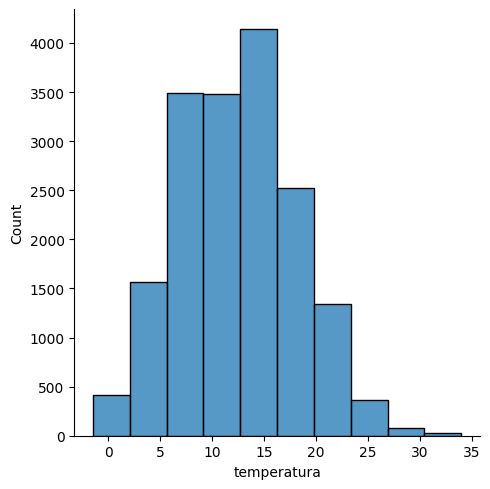

In [ ]:
#visualizando a distribuição dos dados com relação a temperatura.
sns.displot(df_limpo, x='temperatura' , bins=10)
plt.show()

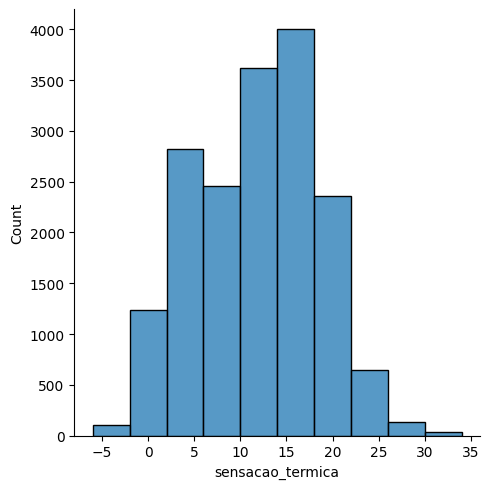

In [ ]:
#visualizando a distribuição dos dados com relação a sensação térmica.
sns.displot(df_limpo, x='sensacao_termica' , bins=10)
plt.show()

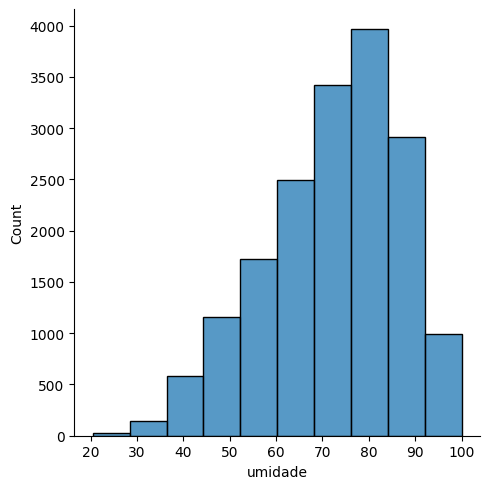

In [ ]:
#visualizando a distribuição dos dados com relação a umidade.
sns.displot(df_limpo, x='umidade' , bins=10)
plt.show()

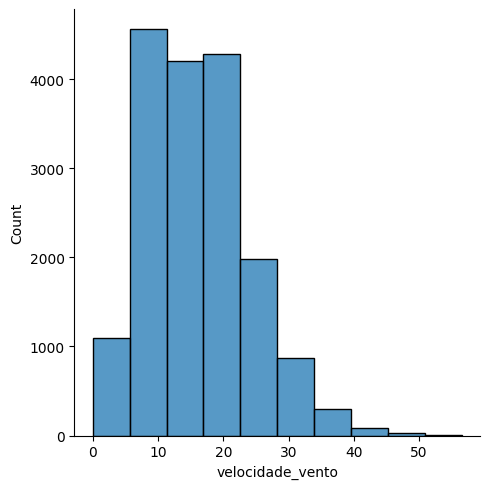

In [ ]:
#visualizando a distribuição dos dados com relação a velocidade do vento.
sns.displot(df_limpo, x='velocidade_vento' , bins=10)
plt.show()

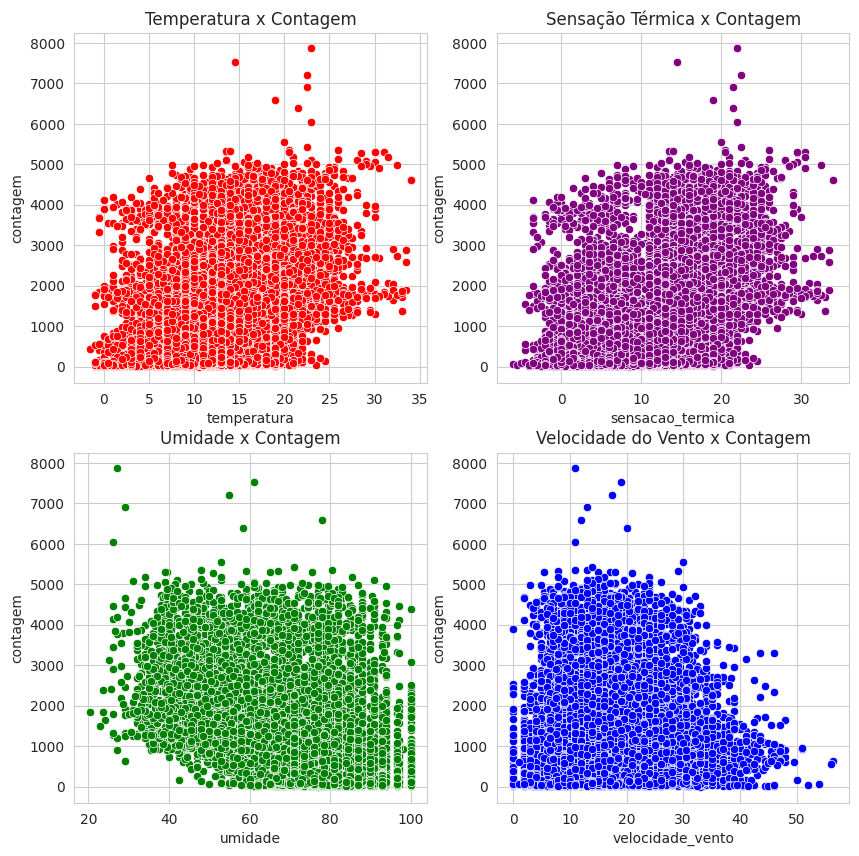

In [ ]:
# prompt: criar um gráfico do tipo scatter plot utilizando as variáveis temperatura,	sensacao_termica, umidade e velocidade_vento. No eixo y utilizar a variavel contagem. Colocar um titulo em cada gráfico. plotar os gráficos 2x2.
sns.set_style('whitegrid')

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.scatterplot(ax=axes[0, 0], x='temperatura', y='contagem', data=df_limpo, color='red')
axes[0, 0].set_title('Temperatura x Contagem')

sns.scatterplot(ax=axes[0, 1], x='sensacao_termica', y='contagem', data=df_limpo, color= 'purple')
axes[0, 1].set_title('Sensação Térmica x Contagem')

sns.scatterplot(ax=axes[1, 0], x='umidade', y='contagem', data=df_limpo, color = 'green')
axes[1, 0].set_title('Umidade x Contagem')

sns.scatterplot(ax=axes[1, 1], x='velocidade_vento', y='contagem', data=df_limpo, color= 'blue')
axes[1, 1].set_title('Velocidade do Vento x Contagem')

plt.show()


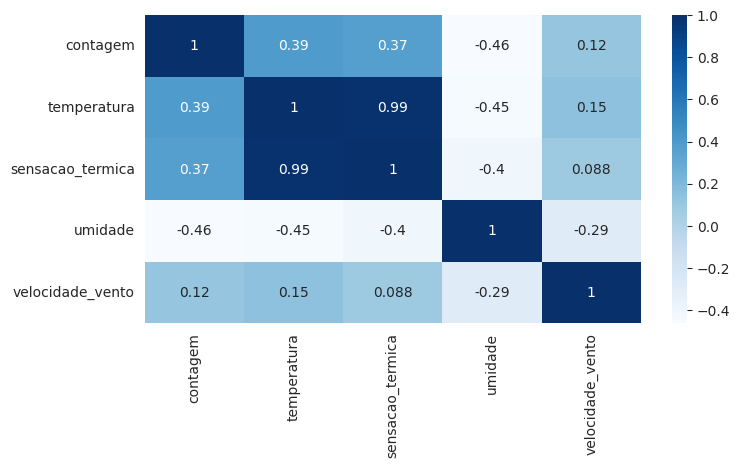

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(df_limpo.corr(numeric_only=True), annot=True, cmap='Blues')
plt.show;

In [ ]:
#analisando as variaveis categoricas
df_limpo.describe(include='object')

,data_hora,clima,feriado,fim_de_semana,estacao
count,17414,17414,17414,17414,17414
unique,17414,6,2,2,4
top,2015-01-04 00:00:00,Céu limpo,Não,Não,Primavera
freq,1,6150,17030,12444,4394


In [ ]:
#descobrir os valores de cada coluna
for col in ['clima','feriado' ,'fim_de_semana', 'estacao']:
  print(f'coluna: {col}')
  print(df_limpo[col].unique())
  print('#'*15,'\n')

coluna: clima
['Nublado' 'Céu limpo' 'Parcialmente nublado' 'Chuva leve' 'Neve'
 'Chuva com trovoadas']
############### 

coluna: feriado
['Não' 'Sim']
############### 

coluna: fim_de_semana
['Sim' 'Não']
############### 

coluna: estacao
['Inverno' 'Primavera' 'Verão' 'Outono']
############### 



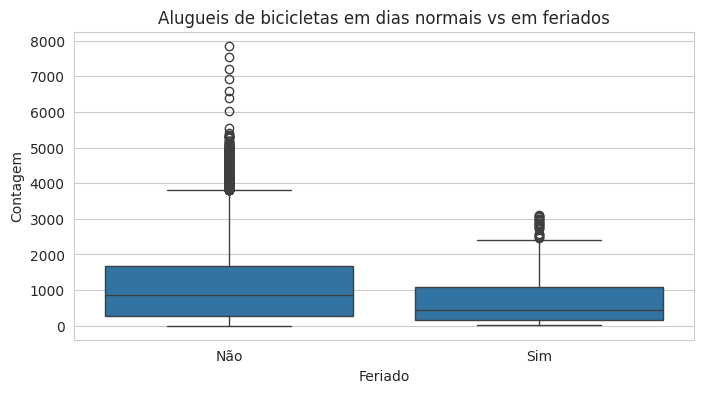

In [ ]:
#Será que a demanda é maior nos feriados?
#criar um boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x='feriado', y='contagem', data=df_limpo)
plt.title('Alugueis de bicicletas em dias normais vs em feriados')
plt.xlabel('Feriado')
plt.ylabel('Contagem')
plt.show()

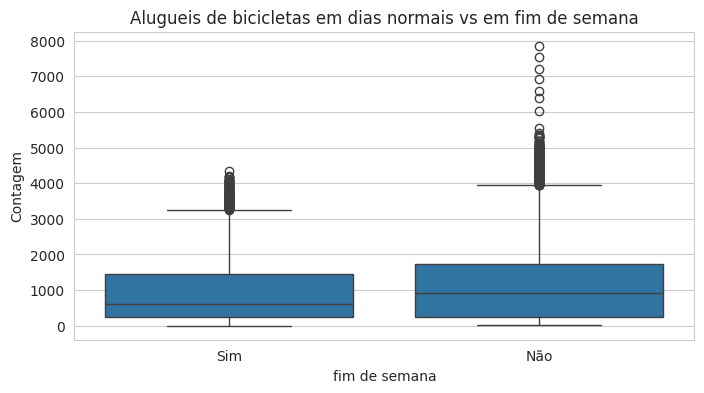

In [ ]:
#Será que a demanda é maior nos finais de semana?
#criar um boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x='fim_de_semana', y='contagem', data=df_limpo)
plt.title('Alugueis de bicicletas em dias normais vs em fim de semana')
plt.xlabel('fim de semana')
plt.ylabel('Contagem')
plt.show()

In [ ]:
mediana_feriado = df_limpo.groupby('feriado')['contagem'].median()
mediana_feriado

,contagem
feriado,
Não,855.0
Sim,439.5


In [ ]:
mediana_fim_de_semana = df_limpo.groupby('fim_de_semana')['contagem'].median()
mediana_fim_de_semana

,contagem
fim_de_semana,
Não,927.0
Sim,619.0


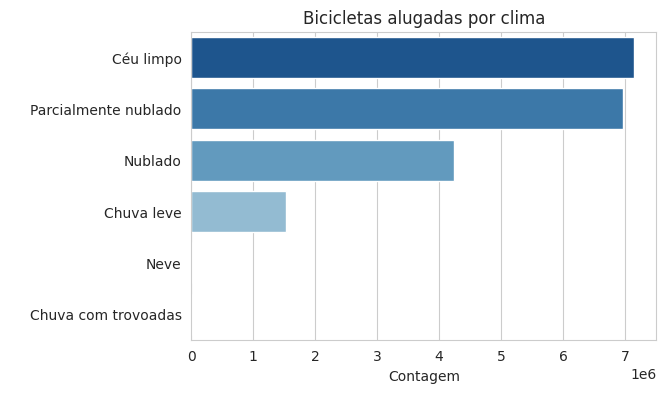

In [ ]:
df_clima = df_limpo.groupby('clima')['contagem'].sum().reset_index().sort_values(by='contagem', ascending= False)

plt.figure(figsize=(6,4))
sns.barplot(data=df_clima, x='contagem', y='clima', hue='clima',palette='Blues_r', orient = 'h')
plt.title('Bicicletas alugadas por clima')
plt.xlabel('Contagem')
plt.ylabel(' ')
plt.show()

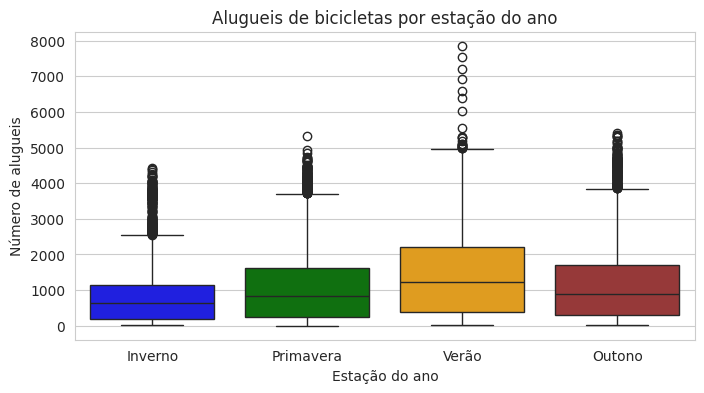

In [ ]:
plt.figure(figsize=(8,4))

paleta_cores = {'Primavera':'green', 'Verão':'orange', 'Outono':'brown', 'Inverno':'blue'}
sns.boxplot(x='estacao', y='contagem', data=df_limpo, hue = 'estacao',palette = paleta_cores)
plt.title('Alugueis de bicicletas por estação do ano')
plt.xlabel('Estação do ano')
plt.ylabel('Número de alugueis')
plt.show()

In [ ]:
#verificar a medida por estação
df_limpo.groupby('estacao')['contagem'].median()

,contagem
estacao,
Inverno,632.0
Outono,898.0
Primavera,823.0
Verão,1214.0


In [ ]:
#teste de hipotese
# H0: primavera é estatisticamente igual a outono.
# H1 : primavera e diferente de outono.
# p-value < 0,05 rejeita a hipotese nula.
primavera = df_limpo[df_limpo['estacao'] == 'Primavera']['contagem']
outono = df_limpo[df_limpo['estacao'] == 'Outono']['contagem']

u_statistic, p_value = mannwhitneyu(primavera, outono, alternative='two-sided')
u_statistic, p_value

(9044682.5, 0.0004762100221646296)

##Ajuste da variável tempo

In [ ]:
#mudar tipo de data
df_data = df_limpo.copy()
df_data['data_hora'] = pd.to_datetime(df_data['data_hora'])

In [ ]:
df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_hora         17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17414 non-null  float64       
 3   sensacao_termica  17414 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
#criar coluna mes
df_data['mes'] = df_data['data_hora'].dt.month
df_data['horario'] = df_data['data_hora'].dt.hour

In [ ]:
df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [ ]:
#deixar só a data
df_data['data_hora'] = df_data['data_hora'].dt.date

In [ ]:
df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [ ]:
#renomear a coluna data_hora
df_data.rename(columns={'data_hora':'data'}, inplace=True)

In [ ]:
df_data.head()

,data,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data              17414 non-null  object 
 1   contagem          17414 non-null  int64  
 2   temperatura       17414 non-null  float64
 3   sensacao_termica  17414 non-null  float64
 4   umidade           17414 non-null  float64
 5   velocidade_vento  17414 non-null  float64
 6   clima             17414 non-null  object 
 7   feriado           17414 non-null  object 
 8   fim_de_semana     17414 non-null  object 
 9   estacao           17414 non-null  object 
 10  mes               17414 non-null  int32  
 11  horario           17414 non-null  int32  
dtypes: float64(4), int32(2), int64(1), object(5)
memory usage: 2.1+ MB


In [ ]:
#mudar o tipo da data
df_data['data'] = pd.to_datetime(df_data['data'])

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data              17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17414 non-null  float64       
 3   sensacao_termica  17414 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
 10  mes               17414 non-null  int32         
 11  horario           17414 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(2), int64(1), object(4)
memory usage: 2.1+ MB


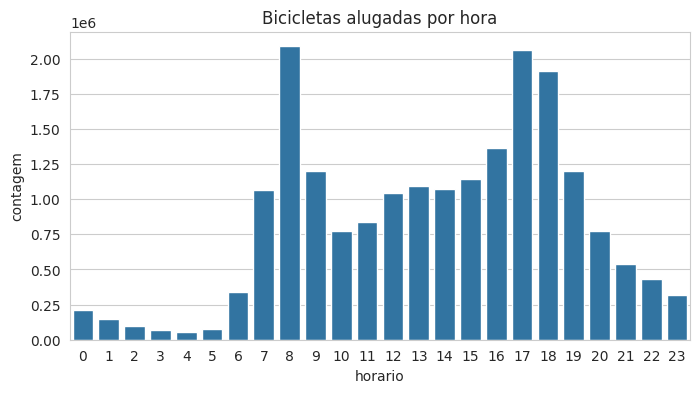

In [ ]:
df_por_hora = df_data.groupby('horario')['contagem'].sum().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=df_por_hora, x='horario', y='contagem')
plt.title('Bicicletas alugadas por hora')
plt.xlabel('horario')
plt.ylabel('contagem')
plt.show()

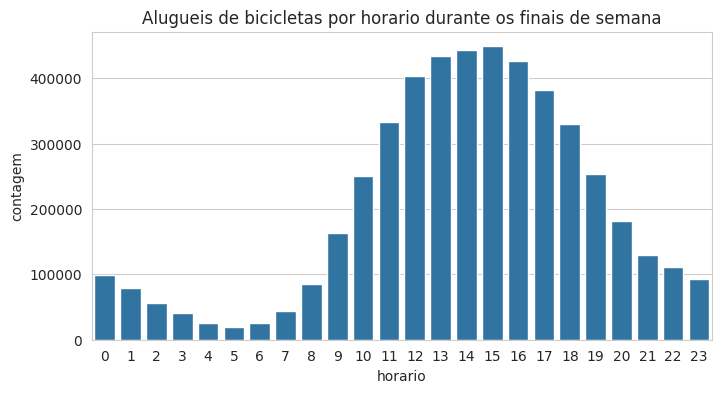

In [ ]:
df_final_de_semana = df_data[df_data['fim_de_semana'] == 'Sim']
alugueis_fim_de_semana = df_final_de_semana.groupby('horario')['contagem'].sum().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x='horario', y='contagem', data=alugueis_fim_de_semana)
plt.title('Alugueis de bicicletas por horario durante os finais de semana')
plt.xlabel('horario')
plt.ylabel('contagem')
plt.show()

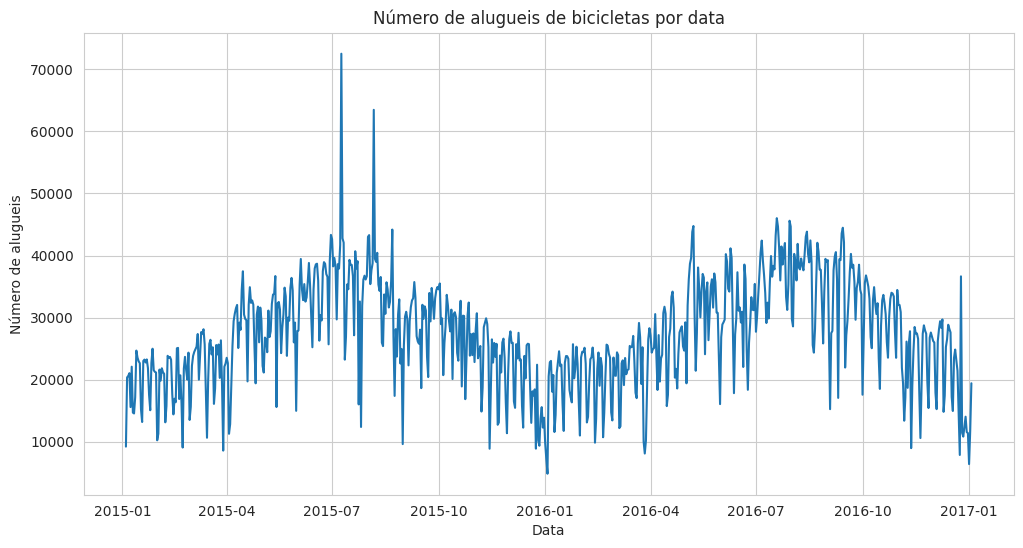

In [ ]:
#criar dataframe com as data agrupadas
df_tempo = df_data.groupby('data')['contagem'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='data',y= 'contagem',data=df_tempo)
plt.title('Número de alugueis de bicicletas por data')
plt.xlabel('Data')
plt.ylabel('Número de alugueis')
plt.show()

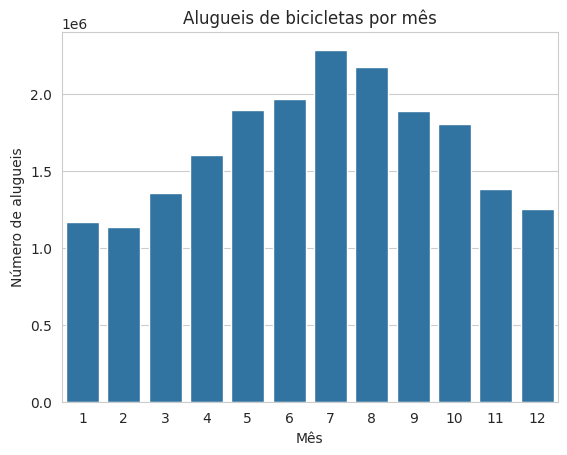

In [ ]:
alugueis_mensais = df_data.groupby('mes')['contagem'].sum().reset_index()

sns.barplot(data=alugueis_mensais, x='mes', y='contagem')
plt.title('Alugueis de bicicletas por mês')
plt.xlabel('Mês')
plt.ylabel('Número de alugueis')
plt.show()

#Previsões com Prophet
###https://facebook.github.io/prophet/

In [ ]:
#criando novo data frame e renomeando as colunas data e contagem de forma que o Prophet reconheça.
df_prophet = df_data[['data','contagem']].rename(columns = {'data': 'ds', 'contagem': 'y'})
df_prophet.head()

,ds,y
0,2015-01-04,182
1,2015-01-04,138
2,2015-01-04,134
3,2015-01-04,72
4,2015-01-04,47


In [ ]:
#precisamos agrupar as datas
df_prophet = df_prophet.groupby('ds')['y'].sum().reset_index()
df_prophet

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [ ]:
np.random.seed(4587) # gerar a semente aleatória
modelo = Prophet()
modelo.fit(df_prophet)
futuro = modelo.make_future_dataframe(periods=90, freq= 'D')
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp1ya_u0k/ses10u7l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp1ya_u0k/ob3qj3ev.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36351', 'data', 'file=/tmp/tmpp1ya_u0k/ses10u7l.json', 'init=/tmp/tmpp1ya_u0k/ob3qj3ev.json', 'output', 'file=/tmp/tmpp1ya_u0k/prophet_modelnux8l57i/prophet_model-20241128220445.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:04:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:04:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


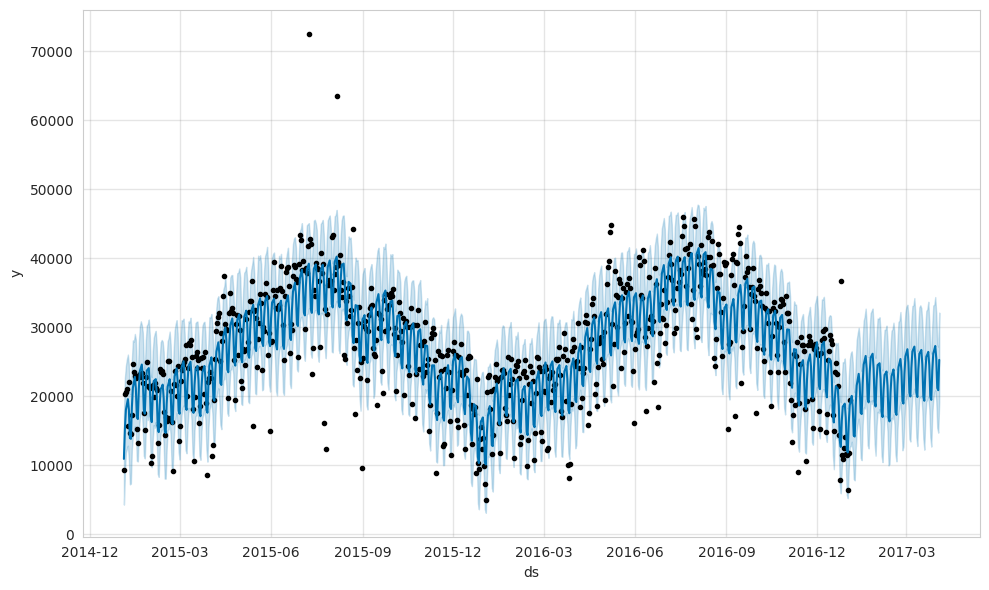

In [ ]:
fig1 = modelo.plot(previsao)

In [ ]:
#verificando os valores da previsao.
previsao[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-04,10901.148240,4272.992256,17164.501687
1,2015-01-05,15311.232708,8913.287413,22636.582586
2,2015-01-06,18014.350866,11829.942639,24414.201504
3,2015-01-07,18744.719144,12344.154062,25364.884607
4,2015-01-08,19556.191727,12809.812197,26023.639264
...,...,...,...,...
815,2017-03-30,27262.740955,20840.917738,34360.842038
816,2017-03-31,25490.750990,19305.507172,31997.954460
817,2017-04-01,21173.750109,15400.577315,27665.232260
818,2017-04-02,20856.740496,14700.917577,27176.730648


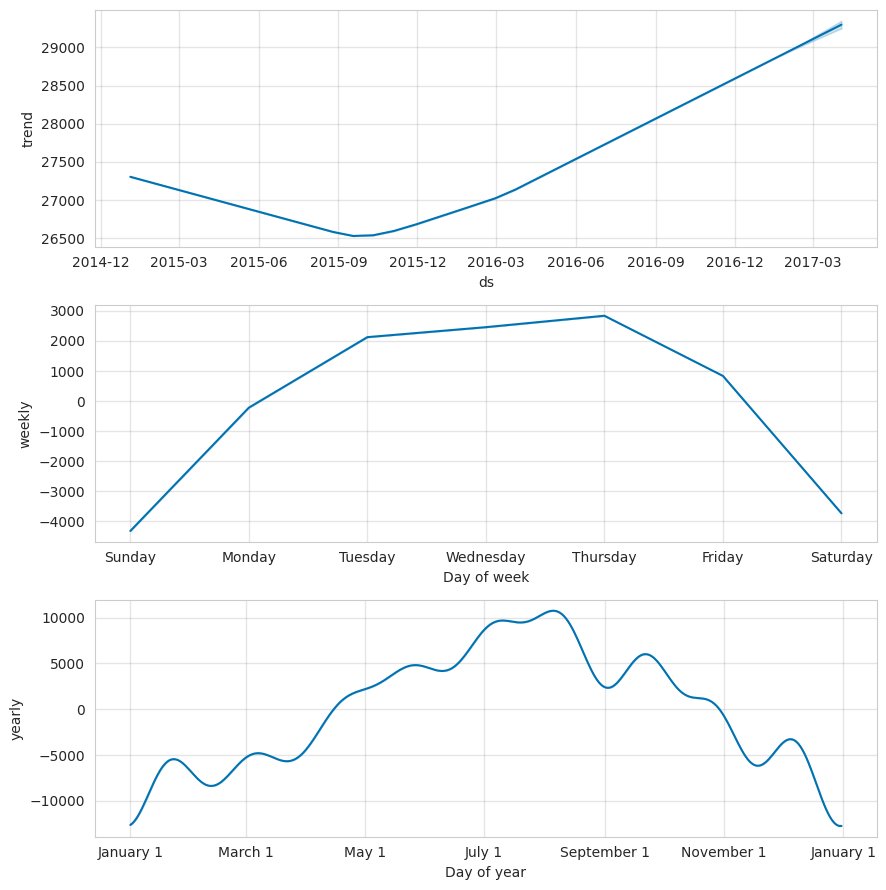

In [ ]:
fig2 = modelo.plot_components(previsao)

In [ ]:
#separa os modelos teste e treino
df_treino = pd.DataFrame()
df_treino['ds'] = df_prophet['ds'][:584]
df_treino['y'] = df_prophet['y'][:584]

df_teste = pd.DataFrame()
df_teste['ds']=df_prophet['ds'][584:]
df_teste['y']=df_prophet['y'][584:]

In [ ]:
np.random.seed(4587)

modelo = Prophet()
modelo.fit(df_treino)
futuro = modelo.make_future_dataframe(periods=150, freq ='D')
previsao = modelo.predict(futuro)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp1ya_u0k/og4zztd1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp1ya_u0k/gxj6bgdc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78009', 'data', 'file=/tmp/tmpp1ya_u0k/og4zztd1.json', 'init=/tmp/tmpp1ya_u0k/gxj6bgdc.json', 'output', 'file=/tmp/tmpp1ya_u0k/prophet_model13c1jm1w/prophet_model-20241128224136.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:41:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:41:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


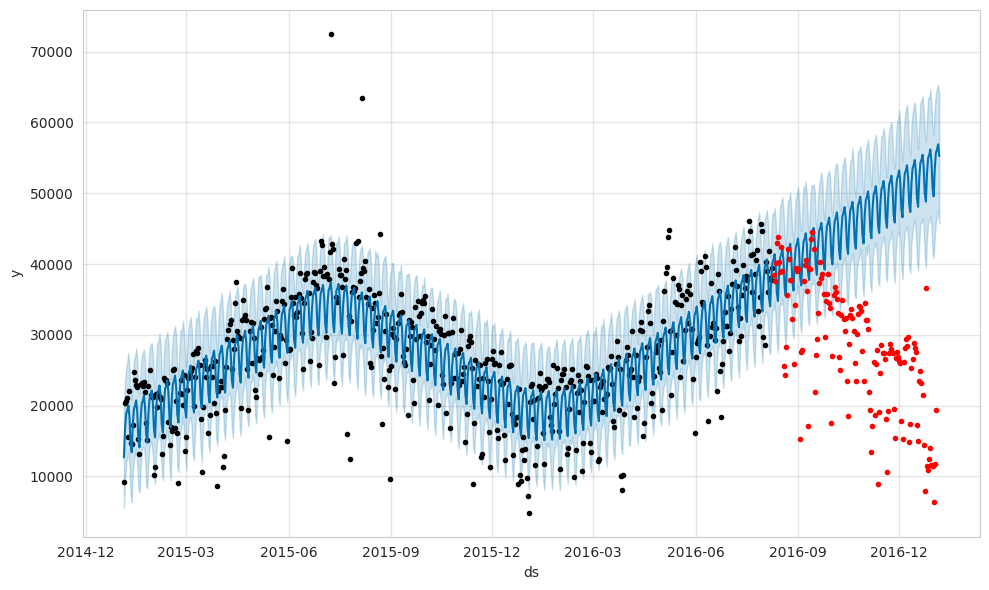

In [ ]:
fig1 = modelo.plot(previsao)
plt.plot(df_teste['ds'],df_teste['y'], '.r')

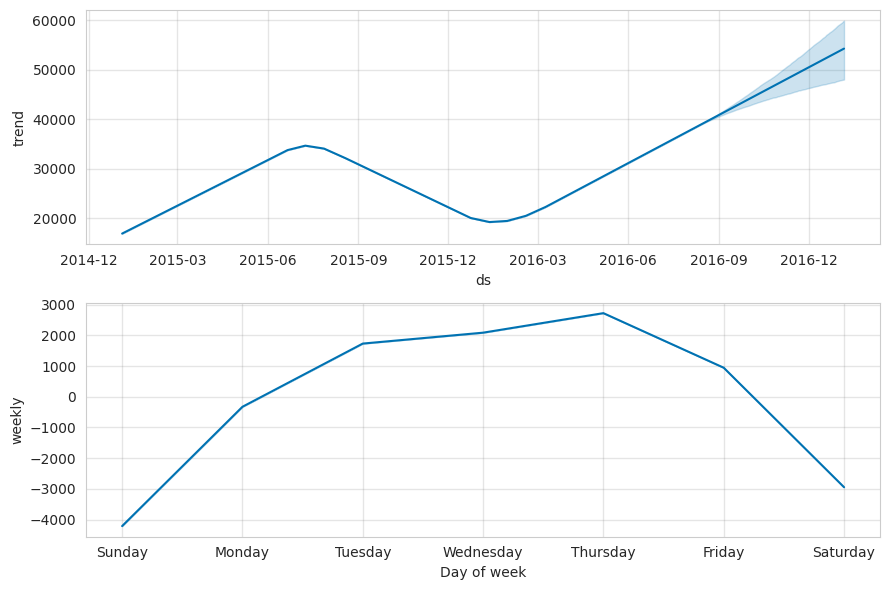

In [ ]:
fig2 = modelo.plot_components(previsao)

In [ ]:
df_previsao = previsao[['ds','yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on='ds')
df_comparacao

,ds,yhat,y
0,2016-08-10,40646.666399,38430
1,2016-08-11,41387.553580,37626
2,2016-08-12,39717.735888,40159
3,2016-08-13,35936.820545,43041
4,2016-08-14,34777.785741,43848
...,...,...,...
141,2016-12-30,54505.511686,11566
142,2016-12-31,50724.596343,11424
143,2017-01-01,49565.561539,6421
144,2017-01-02,53551.536790,11823


In [ ]:
mse = mean_squared_error(df_comparacao['y'],df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}')

MSE: 466132050.6184666, RMSE: 21590.09149166503


In [ ]:
np.random.seed(4587)

modelo = Prophet(yearly_seasonality=True)
modelo.fit(df_treino)
futuro = modelo.make_future_dataframe(periods=150, freq ='D')
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp1ya_u0k/un0494xj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp1ya_u0k/hkiiihbi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34344', 'data', 'file=/tmp/tmpp1ya_u0k/un0494xj.json', 'init=/tmp/tmpp1ya_u0k/hkiiihbi.json', 'output', 'file=/tmp/tmpp1ya_u0k/prophet_modelklqvoq9t/prophet_model-20241129000713.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:07:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:07:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


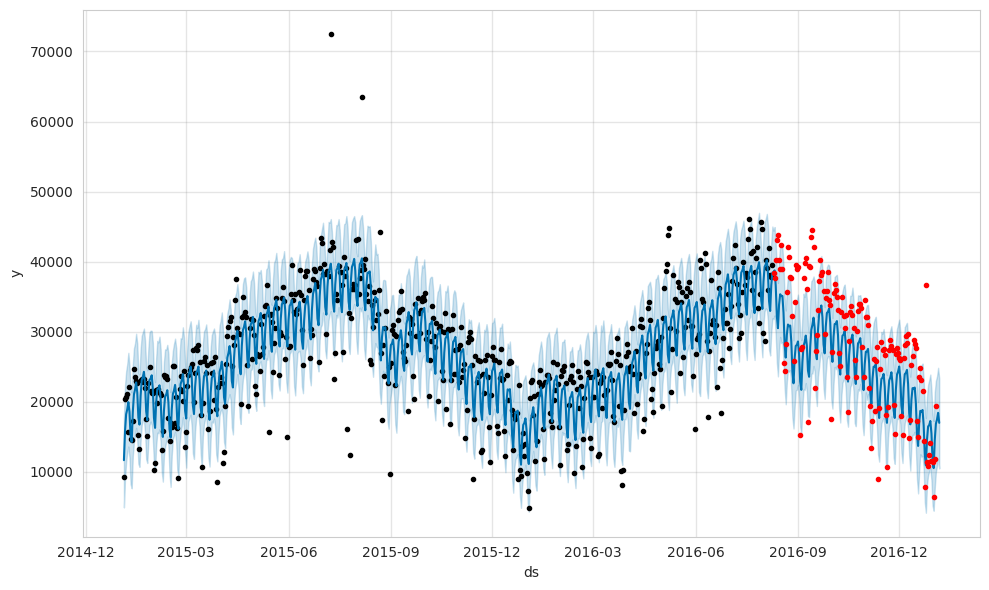

In [ ]:
fig1 = modelo.plot(previsao)
plt.plot(df_teste['ds'],df_teste['y'], '.r')

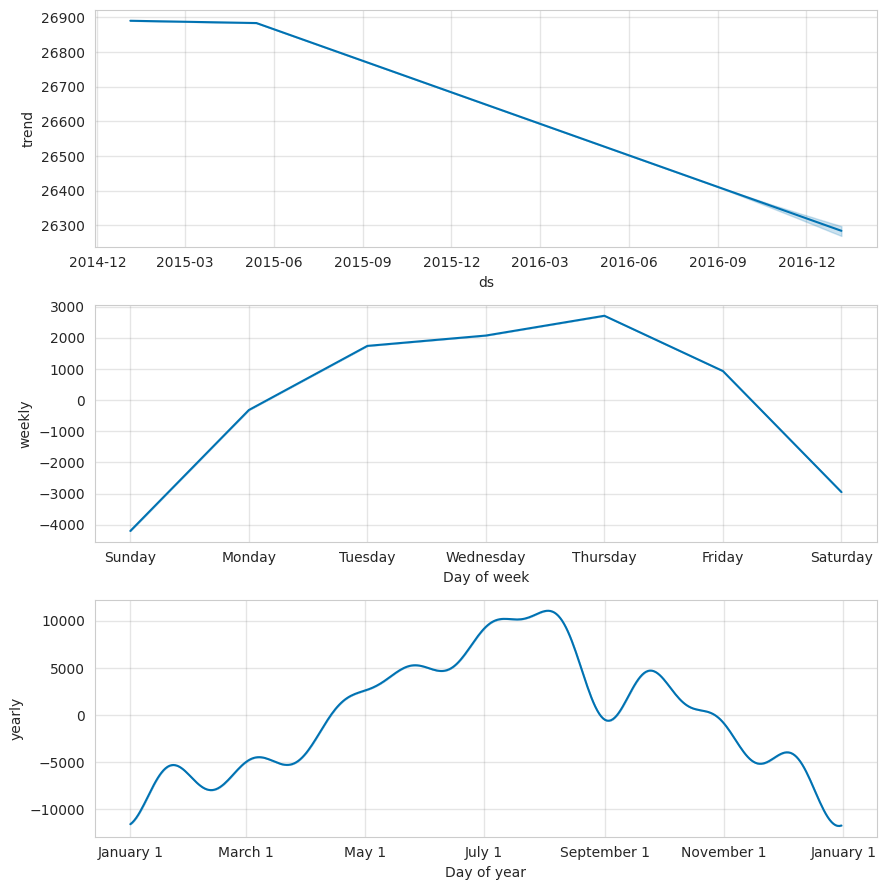

In [ ]:
fig2 = modelo.plot_components(previsao)

In [ ]:
df_previsao = previsao[['ds','yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on='ds')
df_comparacao

,ds,yhat,y
0,2016-08-10,38465.369605,38430
1,2016-08-11,38747.157010,37626
2,2016-08-12,36570.384861,40159
3,2016-08-13,32236.934232,43041
4,2016-08-14,30495.324496,43848
...,...,...,...
141,2016-12-30,15472.686807,11566
142,2016-12-31,11648.789994,11424
143,2017-01-01,10517.646095,6421
144,2017-01-02,14573.011741,11823


In [ ]:
mse = mean_squared_error(df_comparacao['y'],df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}')

MSE: 38623883.499975376, RMSE: 6214.8116222437


In [ ]:
df_prophet

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [ ]:
np.random.seed(4587)

modelo = Prophet()
modelo.fit(df_prophet)
futuro = modelo.make_future_dataframe(periods=0)

previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp1ya_u0k/ir3gsczi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp1ya_u0k/v_ha2hxy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92849', 'data', 'file=/tmp/tmpp1ya_u0k/ir3gsczi.json', 'init=/tmp/tmpp1ya_u0k/v_ha2hxy.json', 'output', 'file=/tmp/tmpp1ya_u0k/prophet_model7qp74q9_/prophet_model-20241129003019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:30:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:30:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
sem_outliers = df_prophet[(df_prophet['y'] > previsao['yhat_lower'])&(df_prophet['y'] < previsao['yhat_upper'])]
sem_outliers

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [ ]:
df_treino = pd.DataFrame()
df_treino['ds'] = sem_outliers['ds'][:505]
df_treino['y'] = sem_outliers['y'][:505]

df_teste = pd.DataFrame()
df_teste['ds']=sem_outliers['ds'][505:]
df_teste['y']=sem_outliers['y'][505:]

In [ ]:
np.random.seed(4587)

modelo_sem_outliers = Prophet(yearly_seasonality=True)
modelo_sem_outliers.fit(df_treino)
futuro = modelo_sem_outliers.make_future_dataframe(periods = 150 , freq = 'D')
previsao = modelo_sem_outliers.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp1ya_u0k/sr6jgqgo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp1ya_u0k/71twnr55.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54801', 'data', 'file=/tmp/tmpp1ya_u0k/sr6jgqgo.json', 'init=/tmp/tmpp1ya_u0k/71twnr55.json', 'output', 'file=/tmp/tmpp1ya_u0k/prophet_modeljqgv_10l/prophet_model-20241129004917.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:49:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:49:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


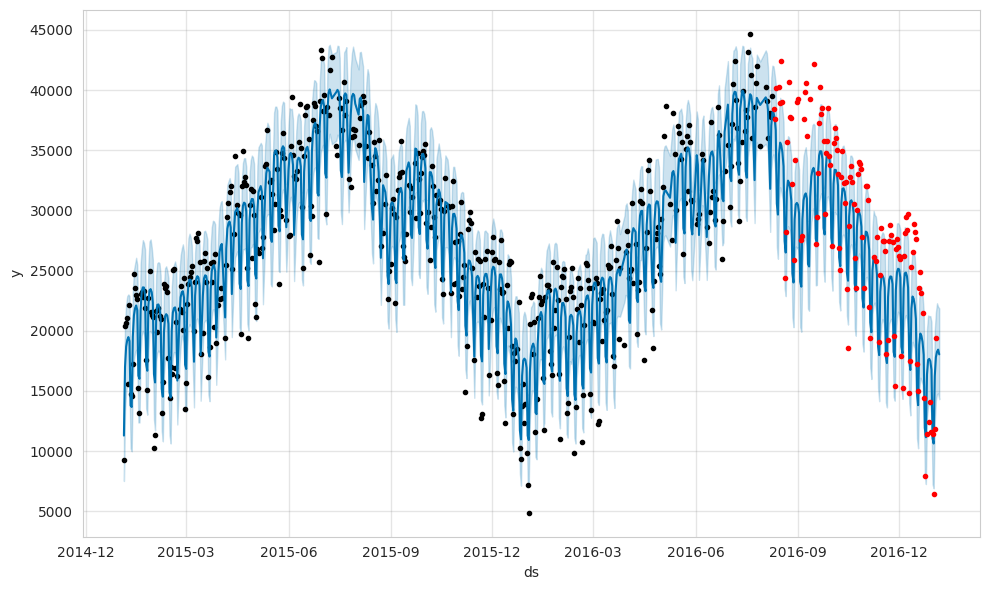

In [ ]:
fig1 = modelo_sem_outliers.plot(previsao)
plt.plot(df_teste['ds'],df_teste['y'], '.r')

In [ ]:
df_previsao = previsao[['ds','yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on='ds')
df_comparacao

,ds,yhat,y
0,2016-08-10,38124.205916,38430
1,2016-08-11,37708.703632,37626
2,2016-08-12,36664.046726,40159
3,2016-08-15,34692.056037,40236
4,2016-08-16,35633.113613,38911
...,...,...,...
121,2016-12-30,16752.064183,11566
122,2016-12-31,11045.380016,11424
123,2017-01-01,10626.497538,6421
124,2017-01-02,16230.512446,11823


In [ ]:
mse = mean_squared_error(df_comparacao['y'],df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}')

MSE: 15672925.764235971, RMSE: 3958.904616713564


In [ ]:
np.random.seed(4587)

modelo_sem_outliers = Prophet(yearly_seasonality=True)
modelo_sem_outliers.fit(df_treino)
futuro = modelo_sem_outliers.make_future_dataframe(periods = 350 , freq = 'D')
previsao = modelo_sem_outliers.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp1ya_u0k/oxl_y248.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp1ya_u0k/pd155pic.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25922', 'data', 'file=/tmp/tmpp1ya_u0k/oxl_y248.json', 'init=/tmp/tmpp1ya_u0k/pd155pic.json', 'output', 'file=/tmp/tmpp1ya_u0k/prophet_modelc65yram_/prophet_model-20241129005943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:59:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:59:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
fig = plot_plotly(modelo_sem_outliers, previsao)
fig.show()